#  DSC540-T302 Data Preparation  #

## Weeks 9 & 10: Advanced Data Gathering and Visualization ##

### Saravanan Janarthanan ###

### Assignment ###

-------------

#### Excercise 1 - ####
#### Activity 7.01: Extracting the Top 100 e-books from Gutenberg ####
#### The Data Wrangling Workshop: Activity 7.01, ####
Project Gutenberg encourages the creation and distribution of eBooks by encouraging volunteer efforts to digitize and archive cultural works. This activity aims to scrape the URL of Project Gutenberg's Top 100 eBooks to identify the eBooks' links. It uses BeautifulSoup to parse the HTML and regular expression code to identify the Top 100 eBook file numbers. You can use these numbers to download the book into your local drive if you want.

In [1]:
# Load the libraries
import re
import requests
from bs4 import BeautifulSoup

In [2]:
# url to access the links of books
top100url = 'https://www.gutenberg.org/browse/scores/top'

# Use the requests module to access the web page content
try:
    req_respns = requests.get(top100url)
    contents = req_respns.content.decode(req_respns.encoding)
except:
    print("Error accessing top100url")

In [3]:
# using BeautifulSoup module load the contents of the webpage
soup = BeautifulSoup(contents)

In [4]:
# From thr web page links are emebededd in a ordered list 
ol = soup.find_all('ol')
print(" Number of tables in the page is  : " , len(ol) )

 Number of tables in the page is  :  6


In [5]:
# Load all the ordered list
ol_tags = soup.find_all('ol')

In [6]:
#  Check all the ordered list in the webpage,  
len(ol_tags)

6

In [7]:
# From the web page there two major list first and second group of oredered list has ebook  names and file nunber,   
# simillarly second one has author name and file number,  will use onlt those 2 lists
url_lst= []
yes_url_lst =[]
# Iterate through all 6 ordered list
for index,  ol in enumerate(ol_tags):
    # strip all the string values in first ordered list that has book name and author names and add it to a list
    if(index == 0):
        url_lst = [li.string for li in ol.findAll('li')]
    # strip all the string values in second ordered list that has author names and add it to a list
    elif(index == 1):
        yes_url_lst = [li.string for li in ol.findAll('li')]
    else:
        continue
        



In [8]:
# Split the file number and book name from the url links and add it lists 
filnum = []
bk_nm = []
for link in url_lst:
    n=re.findall('[0-9]+',link)
    filnum.append(n[len(n)-1])
    str_ar = link.split("(")
    bk_nm.append(str_ar[0])



In [9]:
# print all the filenumbers
print(filnum)

['2207', '2148', '1908', '1753', '1730', '1644', '1631', '1521', '1515', '1433', '1427', '1398', '1391', '1338', '1327', '1324', '1307', '1085', '856', '614', '605', '587', '572', '539', '529', '511', '477', '461', '435', '426', '412', '402', '401', '393', '393', '385', '385', '371', '368', '355', '351', '349', '348', '341', '336', '328', '303', '299', '292', '291', '285', '276', '275', '275', '267', '265', '259', '256', '256', '255', '254', '254', '254', '253', '251', '249', '244', '243', '241', '240', '238', '236', '234', '234', '232', '227', '226', '225', '223', '221', '214', '213', '212', '211', '211', '209', '204', '203', '202', '201', '200', '199', '196', '193', '192', '189', '186', '184', '182', '181']


In [10]:
# Print on the book name
for item in bk_nm:
    print(item)

Romeo and Juliet by William Shakespeare 
Moby Dick; Or, The Whale by Herman Melville 
Pride and Prejudice by Jane Austen 
Middlemarch by George Eliot 
A Room with a View by E. M.  Forster 
The Complete Works of William Shakespeare by William Shakespeare 
Little Women; Or, Meg, Jo, Beth, and Amy by Louisa May Alcott 
The Enchanted April by Elizabeth Von Arnim 
The Blue Castle: a novel by L. M.  Montgomery 
The Adventures of Ferdinand Count Fathom — Complete by T.  Smollett 
Cranford by Elizabeth Cleghorn Gaskell 
The Adventures of Roderick Random by T.  Smollett 
The Expedition of Humphry Clinker by T.  Smollett 
History of Tom Jones, a Foundling by Henry Fielding 
My Life — Volume 1 by Richard Wagner 
Twenty years after by Alexandre Dumas and Auguste Maquet 
Frankenstein; Or, The Modern Prometheus by Mary Wollstonecraft Shelley 
Alice's Adventures in Wonderland by Lewis Carroll 
Home labor saving devices by Rhea C.  Scott 
The Picture of Dorian Gray by Oscar Wilde 
A Tale of Two Cities

####  Excercise 2  ####
####   Activity 7.02: Building Your Own Movie Database by Reading an API ####

In this activity, you will build a complete movie database by communicating and interfacing with a free API from the OMDb portal http://www.omdbapi.com/?.You will obtain a unique user key from the OMDb website that must be used when your program tries to access the API. Then, you will need to store this key value in a .json file.

key 3bd84483

In [11]:
# load the urllib modules 
import urllib.request, urllib.parse, urllib.error
import json

In [12]:
# a key from OMDB was requested and the given key is added to a file to load at runtime 
with open('APIkeys.json') as f:
    keys = json.load(f)
    omdbapi = keys['OMDBapi']

In [13]:
# create a function that recieved json data and prints title info by breaking them as Title info, General info, 
# Cast and crew and info ,  Ratings indo and misc info.
def print_json(json_data):

    # Store the category and info keys in a dictionary to travese through and print friendly groups
    move_dict = {
                "Title Info" : ['Title', 'Type', 'Year', 'Genre' ],
                "General": ['Rated', 'Released','Runtime', 'Language', 'Country'],
                "Cast" : ['Director', 'Writer','Actors'],
                "Misc Info" : ['Awards', 'imdbVotes', 'imdbID'],
                "Ratings" : ['Metascore', 'imdbRating']
        
                }
    # store the categorical keys in a list
    main_keys = ['Title Info', 'General', 'Cast', 'Misc Info','Ratings']

    # Iterate through main category keys list and use that key to get the individual group item keys 
    # use group iem key to fetch the details from json data and print it
    print("-"*50)
    for key in main_keys:
        print(key)
        dict_vals = move_dict[key]
        print_str = ""
        for vals in dict_vals:
            if vals in list(json_data.keys()):
                print_str = print_str + vals + " : " + json_data[vals] + " * "
        print(print_str)
        print("-"*50)
        
    print("Other Ratings")
    for rat_item in json_data['Ratings']:
        print(rat_item['Source'] + " : " + rat_item['Value'] )
    print("-"*50)    



In [14]:
# Search odmb data for the given title. Thsi function calls the web service and retreives data and 
# sends it to print the title info  and
# also to save the title image
def searchMovieInODMB(title_name, saveTitleImage=False):
    # build the url params witk key value pair
    url_param = {}
    url_param['apikey'] = omdbapi
    url_param['t'] = title_name
    # set the API endpoint
    omdb_url = "http://www.omdbapi.com"
    
    # use the response module to fetch the title details
    try:
        response = requests.get(url=omdb_url, params=url_param)
        json_res_data = response.json()
        # check if the response was sucessfully recieved ,  'Response' attribute with 'True' means title info is available 
        # incorrect title name also throws error
        if json_res_data['Response'] == 'True':
            print_json(json_res_data)
            if saveTitleImage:
                img_url = json_res_data['Poster']
                save_poster_file(img_url , title_name)
        else:
            err_msg = "Error Occured while searching title " + title_name
            if 'Error' in list(json_res_data.keys()):
                err_msg = err_msg + " Error Message recieved : "+ json_res_data['Error']
            print(err_msg)
    # Catch any exceptions and print the exception error
    except Exception as e:
        print(f"Error while retrieving title details from OMDB : {e}")
        print(e)

In [15]:
# a method to store the image file from the url listed in the  titlte info.  Image url is stored in 'Poster' attribute and it
# is retrieved by the calling function.  this function creates a 'movie_image' folder in local directory path and then creates 
# a folder wih the ttle name and also the file names is renamed using the title name.
import os
def save_poster_file(file_url, title_nm):
    try:
        file_path ='movie_image/'+ title_nm
        os.makedirs(file_path, exist_ok=True)
        print('Created directory')
        response = requests.get(file_url)
        response.raise_for_status()
        img_extn = file_url.split('.')[-1]
        filename = file_path+"/"+title_nm+"."+img_extn
        with open(filename, 'wb') as file:
            file.write(response.content)
        print(f"Image successfully saved to {file_path}")    
    except requests.exceptions.RequestException as re:
        print(f"An network error occurred while retireving image: {re}")
    except Exception as e:
        print(f"An error occurred while saving image: {e}")

In [16]:
# execute the fucntions 
searchMovieInODMB('Titanic', True)

--------------------------------------------------
Title Info
Title : Titanic * Type : movie * Year : 1997 * Genre : Drama, Romance * 
--------------------------------------------------
General
Rated : PG-13 * Released : 19 Dec 1997 * Runtime : 194 min * Language : English, Swedish, Italian, French * Country : United States, Mexico * 
--------------------------------------------------
Cast
Director : James Cameron * Writer : James Cameron * Actors : Leonardo DiCaprio, Kate Winslet, Billy Zane * 
--------------------------------------------------
Misc Info
Awards : Won 11 Oscars. 126 wins & 83 nominations total * imdbVotes : 1,280,439 * imdbID : tt0120338 * 
--------------------------------------------------
Ratings
Metascore : 75 * imdbRating : 7.9 * 
--------------------------------------------------
Other Ratings
Internet Movie Database : 7.9/10
Rotten Tomatoes : 88%
Metacritic : 75/100
--------------------------------------------------
Created directory
Image successfully saved to m

### Excercise 3. ####
#### Connect to an API of your choice and do a simple data pull - you can use any API - except the API you have selected for your project. ####

In [17]:
# Connect to a goweather api to print the weather details .  The go-weather returns current wetaher and forecast for next 3 days
# The recieved JSON data is printed 
import json

temp_unit = 'ᴼC'

# set the API endpoint
url = "https://goweather.herokuapp.com/weather/Dallas"

json_data = ""
try:    
    # Make the GET request
    response = requests.get(url)

    # Check if the request was successful
    if response.status_code == 200:
        # Parse the JSON response
        json_data = response.json()
        print("Data retrieved from the API:\n")
        wthr_keys = ["temperature", "wind", "description", "forecast"]
        print("City :  Dallas")
        print("*"*50)
        
        #Print the forecast details by iterating the key value pairs for better formatting
        for k in wthr_keys:
            if k in list(json_data.keys()):
                if(k=='forecast'):
                    print("\n"+ k)
                    forecast_lst = json_data[k]
                    for day in forecast_lst:
                        print(day)
                else:
                    print(f"{k}: {json_data[k]}")

    else:
        print(f"Failed to retrieve data: {response.status_code}")
except:
    print("Error while accessing the Go Weather API")

Data retrieved from the API:

City :  Dallas
**************************************************
temperature: +29 °C
wind: 22 km/h
description: Sunny

forecast
{'day': '1', 'temperature': '27 °C', 'wind': '18 km/h'}
{'day': '2', 'temperature': '27 °C', 'wind': '24 km/h'}
{'day': '3', 'temperature': '+24 °C', 'wind': '30 km/h'}


#### Excercise 4. ####
#### Using one of the datasets provided in Weeks 7 & 8, or a dataset of your own, choose 3 of the following visualizations to complete. You must submit via PDF along with your code if you are using Pycharm, otherwise if you submit a notebook file make sure your plots are visible in your notebook or PDF that you submit. You are free to use Matplotlib, Seaborn or another package if you prefer.  ####

a. Line
b. Scatter
c. Bar
d. Histogram
e. Density Plot
f. Pie Chart

In [18]:
import pandas as pd
# Load the meta objects csv file to a Dataframe
snp_500_df = pd.read_csv("SNP_500_Performance_data.csv", encoding='utf-8', encoding_errors='replace')

In [19]:
# Print the dataframe
snp_500_df

,Symbol,Name,Market Cap,P/E,EPS,Net Income,Beta,Dividend,Div Yield,Extended Hr Last Price,...,52W Low,52W High,Wtd Alpha,YTD %Chg,1M %Chg,3M %Chg,52W %Chg,Sector,ISIN,Volume
0,A,Agilent Technologies,4.223508e+10,26.32,5.37,1240000000,1.11,0.922,0.64%,144.1200,...,96.80,151.58,12.11,3.66%,-0.16%,10.39%,4.37%,Health Technology,US00846U1016,1.656?M
1,AAL,American Airlines Gp,9.009457e+09,5.24,2.64,822000000,1.57,NaN,0.00%,13.7500,...,10.86,19.08,2.39,0.15%,-6.20%,1.18%,-0.94%,Transportation,US02376R1023,30.632?M
2,AAPL,Apple Inc,2.620000e+12,26.30,6.42,96995000000,1.27,0.960,0.57%,169.4700,...,159.78,199.62,-3.00,-11.92%,-0.32%,-6.40%,3.55%,Electronic Technology,US0378331005,42.104?M
3,ABBV,Abbvie Inc,3.010000e+11,15.11,11.11,4863000000,0.58,5.990,3.52%,169.9900,...,130.96,182.89,10.74,9.70%,-5.11%,4.85%,5.72%,Health Technology,US00287Y1091,7.03?M
4,ABNB,Airbnb Inc Cl A,1.050000e+11,36.85,4.31,4792000000,1.25,NaN,0.00%,161.7700,...,103.55,170.10,43.69,18.83%,1.53%,18.97%,40.25%,Consumer Services,US0090661010,2.226?M
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
498,XYL,Xylem Inc,3.109252e+10,34.58,3.68,609000000,1.10,1.350,1.05%,128.6500,...,87.59,130.86,29.63,12.16%,1.65%,14.37%,27.92%,Producer Manufacturing,US98419M1009,753.965?K
499,YUM,Yum! Brands,3.828983e+10,26.36,5.17,1597000000,1.10,2.485,1.83%,136.1000,...,115.53,143.24,3.21,4.16%,-1.87%,6.05%,3.15%,Consumer Services,US9884981013,1.736?M
500,ZBH,Zimmer Biomet Holdings,2.616135e+10,16.87,7.56,1024000000,1.01,0.960,0.75%,127.3300,...,102.00,149.25,-0.60,4.63%,2.04%,6.13%,-0.98%,Health Technology,US98956P1021,791.726?K
501,ZBRA,Zebra Technologies,1.492002e+10,33.29,8.80,296000000,1.79,NaN,0.00%,291.8600,...,194.59,320.55,4.97,6.24%,2.05%,14.92%,-3.26%,Electronic Technology,US9892071054,216.727?K


#### 4.1 -  Pie Chart ####

In [20]:
# Use the sector value counts - Numnber of records against each sector category
sector_data = snp_500_df.Sector.value_counts()

In [21]:
# assign the value count data into category index and its counts 
sec_idx = sector_data.index
sec_values = sector_data.values

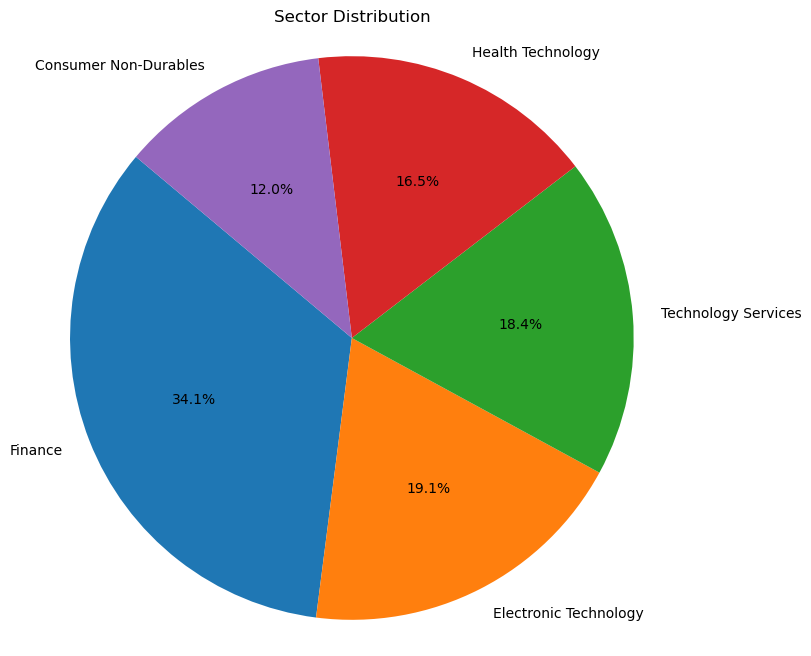

In [22]:
import matplotlib.pyplot as plt

# Data
labels = sec_idx[:5]
sizes = sec_values[:5]

# Create a pie chart
plt.figure(figsize=(8, 8))
# plot the pie with the first cateory pie line ar 140 degrees
plt.pie(sizes, labels=labels, autopct='%1.1f%%', startangle=140)
plt.axis('equal')  # Equal aspect ratio ensures that pie is drawn as a circle
plt.title('Sector Distribution')

# Show the plot
plt.show()

#### 4.2 -Histogram ####

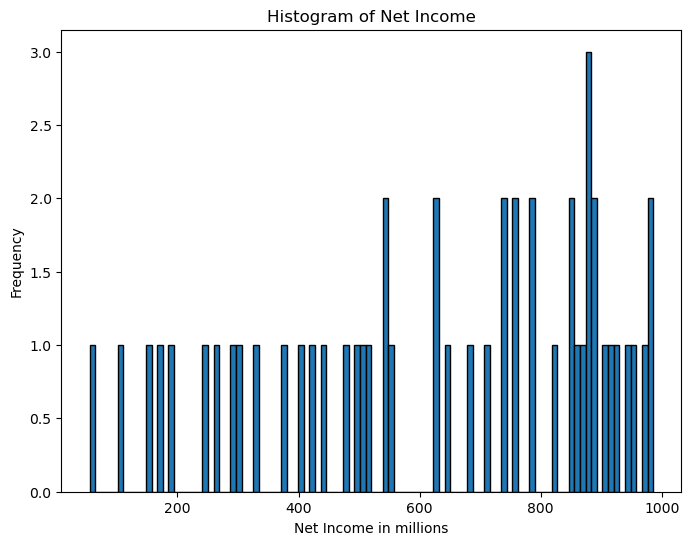

In [23]:
# Use the Net income values to print a histogram.  Print the histogram but converting the values to millions
ref_df = snp_500_df[(snp_500_df['Net Income'] < 1000000000) & (snp_500_df['Net Income'] > 1000000)]
data_hist = ref_df['Net Income'][:50]
data_hist = data_hist / 1000000

# Create a histogram
plt.figure(figsize=(8, 6))
plt.hist(data_hist, bins=100, edgecolor='black')
plt.title('Histogram of Net Income')
plt.xlabel('Net Income in millions')
plt.ylabel('Frequency')

# Show the plot
plt.show()

#### 4.1 - Scatter Plot ####

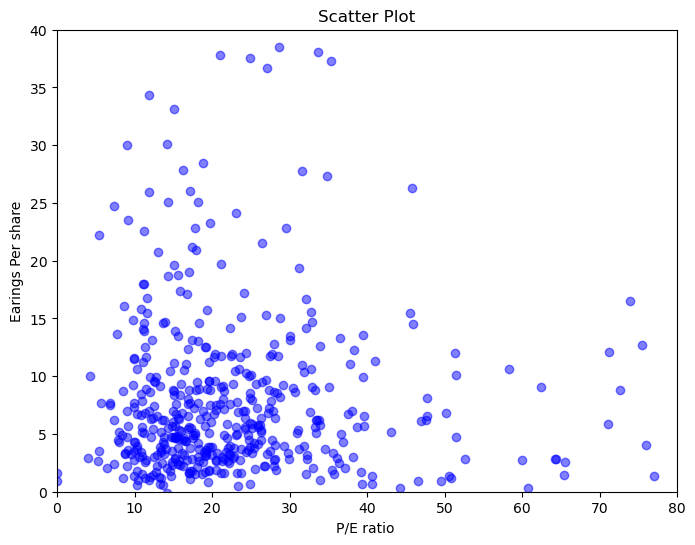

In [24]:
# Use the Price earning ratio  and EPS (Earnings Per share) values to print the scatter plot
x = snp_500_df['P/E']
y = snp_500_df['EPS']

# Create a scatter plot
plt.figure(figsize=(8, 6))
plt.scatter(x, y, color='blue', alpha=0.5) 
plt.title('Scatter Plot')
plt.xlabel('P/E ratio ')
plt.ylabel('Earings Per share')
plt.xlim(0, 80)  
plt.ylim(0, 40)  

# Show the plot
plt.show()